In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sqlalchemy.util.compat import import_
%matplotlib inline

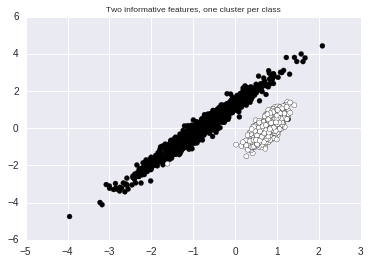

In [8]:
# Generate dataset for classification
from sklearn.datasets import make_classification
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_samples=2000,n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)

# Preprocess data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1)
X1 = scaler.transform(X1)

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

In [9]:
import numpy as np
X1.shape

(2000, 2)

In [10]:
# Generate Train test split for cross valiation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1,
                test_size=0.2, random_state=0)
print(X_train.shape,X_test.shape)

((1600, 2), (400, 2))


In [11]:
W=np.zeros(X_train.shape[1])
bias = 0

In [12]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [13]:
loss = 0
for i in range(X_train.shape[0]):
    y_pred = sigmoid(np.dot(X_train[i],W) + bias) #sigma(u)
    y = y_train[i]
    loss += (y - y_pred)*(y - y_pred)
loss = loss/2
loss

200.0

In [14]:
# Find accuracy
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if (actual[i]>0.5) == (predicted[i]>0.5):
            correct += 1
    return correct / float(len(actual)) * 100.0

# Training
max_epoch = 100
lr = 0.001
Training_data = {"trainLoss":[],"testLoss":[],"trainAcc":[],"testAcc":[]}
for epoch in range(max_epoch):
    YP = []
    loss = 0
    for i in range(X_train.shape[0]):
        y_pred_temp = sigmoid(np.dot(X_train[i],W)+bias)        
        loss += (y_train[i] - y_pred_temp)*(y_train[i] - y_pred_temp) #J
        YP.append(y_pred_temp)
        
    loss = loss/2
        
    YP_test = []
    loss_test = 0
    for i in range(X_test.shape[0]):
        y_pred_temp = sigmoid(np.dot(X_test[i],W)+bias)        
        loss_test += (y_test[i] - y_pred_temp)*(y_test[i] - y_pred_temp) #J
        YP_test.append(y_pred_temp)        
    
    loss_test = loss_test/2
    trainAcc = accuracy_metric(y_train,YP)
    testAcc = accuracy_metric(y_test,YP_test)
    
    Training_data["trainLoss"].append(loss/X_train.shape[0])
    Training_data["testLoss"].append(loss_test/X_test.shape[0])
    Training_data["trainAcc"].append(trainAcc)
    Training_data["testAcc"].append(testAcc)
    
    
    if epoch%10==0:
        print("J, Train loss:%f" %(loss))
        print("J, Test loss:%f" %(loss_test))
        print("Training accuracy: %f" %(trainAcc))
        print("Validation accuracy: %f" %(testAcc))
        
    YP = np.array(YP)
    
    #Update bias
    grad_bias = 0
    for i in range(X_train.shape[0]):
        grad_bias += (YP[i] - y_train[i])*(YP[i])*(1-YP[i]) #dJ/db
    bias = bias - grad_bias*lr
    
    #Update weights    
    for j in range(len(W)):
        grad_wj = 0        
        for i in range(X_train.shape[0]):
            grad_wj += (YP[i] - y_train[i])*(YP[i])*(1-YP[i])*(X_train[i][j]) #dJ/dW
        W[j] = W[j] - grad_wj*lr
        
    
    
                

J, Train loss:200.000000
J, Test loss:50.000000
Training accuracy: 50.687500
Validation accuracy: 47.250000
J, Train loss:84.064872
J, Test loss:22.194320
Training accuracy: 96.625000
Validation accuracy: 95.500000
J, Train loss:51.446629
J, Test loss:14.098710
Training accuracy: 98.937500
Validation accuracy: 98.000000
J, Train loss:36.464512
J, Test loss:10.409204
Training accuracy: 99.437500
Validation accuracy: 98.750000
J, Train loss:28.248816
J, Test loss:8.417663
Training accuracy: 99.500000
Validation accuracy: 98.750000
J, Train loss:23.165009
J, Test loss:7.201972
Training accuracy: 99.625000
Validation accuracy: 98.750000
J, Train loss:19.739916
J, Test loss:6.391732
Training accuracy: 99.687500
Validation accuracy: 98.750000
J, Train loss:17.286556
J, Test loss:5.816402
Training accuracy: 99.687500
Validation accuracy: 98.750000
J, Train loss:15.447191
J, Test loss:5.388173
Training accuracy: 99.687500
Validation accuracy: 98.750000
J, Train loss:14.018911
J, Test loss:5.05

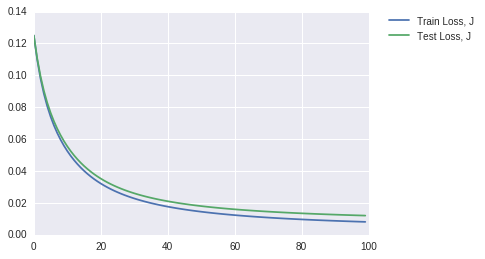

In [15]:
t = range(max_epoch)
plt.plot(t, Training_data['trainLoss'],label='Train Loss, J')
plt.plot(t,Training_data['testLoss'],label="Test Loss, J")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()